# Assignment 1 (FA17-BCS-022)

### Classification Of MNIST Dataset using Naive Bayes and Decision Tree.



### Steps Involved in task

1. Importing the data 
2. Visualizing\Exploring the data
3. Cleaning and Preparing the data
4. Applying the model
5. Comparing the results


### Setting up environment

In [1]:
### Step1 

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#### Making custom confusion matrix by using heatmaps for better visualization

In [2]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Classification accuracy: {acc* 100}")

#### Importing Data 

In [3]:
train = pd.read_csv('train.csv')

In [ ]:
train.shape

#### Visualizing the data With help of bar graph 

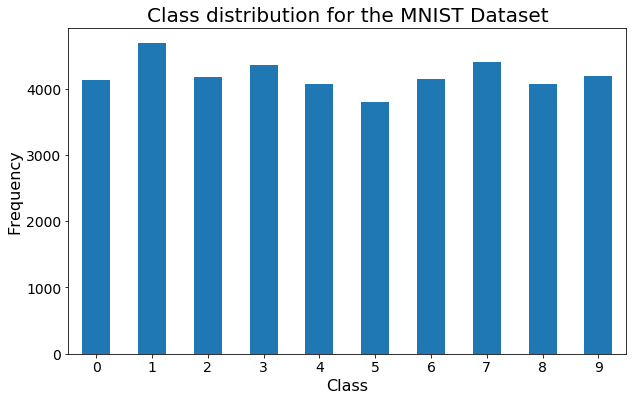

In [10]:
#Visualize target distribution
train['label'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Class distribution for the MNIST Dataset', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Frequency', fontsize=16);

####  Breakking the data in training and target variable

In [4]:
X=train.iloc[:,1:]
y=train['label']
label = sorted(y.unique())
print(label)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Visualizing the expected inputs

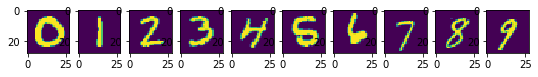

In [11]:
plt.figure(figsize=(9,9))
for i in label:
    plt.subplot(1,10, i+1)
    img = np.array( X[y==i][1:2] ).reshape(28,28)
    plt.imshow(img)

#### using traintest split to divide data for cross validation

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size = 0.33,
                                                      random_state=0)


## Training the models

### NaiveBayes Model

Sum Axis-1 as Classification accuracy: 55.98845598845599


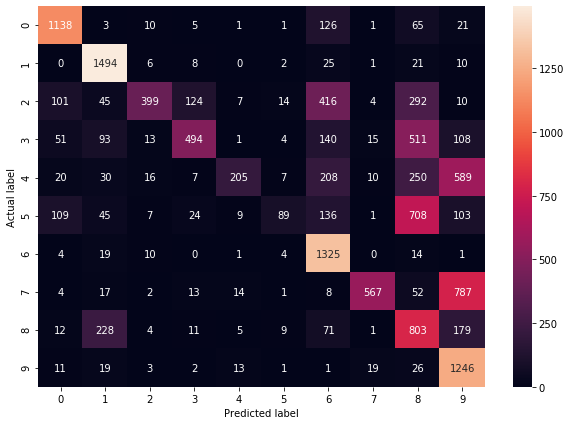

In [12]:
model = GaussianNB()

#Dividing the data by using train test split
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

draw_confusionmatrix(y_valid, y_pred)
#print(classification_report(y_valid,y_pred))

### Decision Tree Classifier

Sum Axis-1 as Classification accuracy: 84.8917748917749


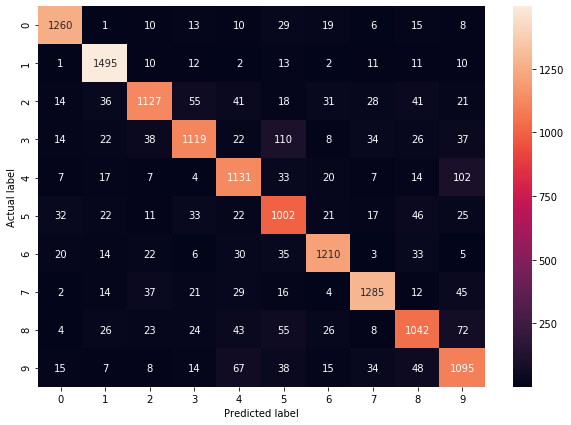

In [7]:
dtModel = DecisionTreeClassifier(max_depth = 10,random_state=0,class_weight='balanced')
dtModel.fit(X_train,y_train)
y_preddt = dtModel.predict(X_valid)
draw_confusionmatrix(y_valid, y_preddt)


## Comparison  Naive  Bayes versus  Decision Tree on MNIST Dataset

### NB Classifier Accuracy Score : 55.98
### Decision Tree Accuracy Score : 84.89

#### Models Name                        
First column is NB & second is DT

#### Correctly Predicted 0     1138       1260
#### Correctly Predicted 1     1494       1495
#### Correctly Predicted 2     399        1127
#### Correctly Predicted 3     494        1119
#### Correctly Predicted 4     205        1131
#### Correctly Predicted 5     89         1002
#### Correctly Predicted 6     1325       1210
#### Correctly Predicted 7     567        1285
#### Correctly Predicted 8     803        1042
#### Correctly Predicted 9     1246       1095

### Optional : RandomForestClassifier

Sum Axis-1 as Classification accuracy: 96.03174603174604


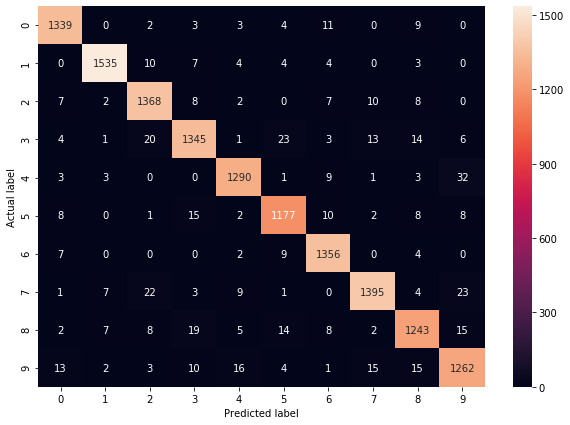

In [8]:
from sklearn.ensemble import RandomForestClassifier
rdc = RandomForestClassifier(n_estimators=100)
rdc.fit(X_train,y_train)
predictions = rdc.predict(X_valid)
draw_confusionmatrix(y_valid, predictions)